# 🌟 Seminário – XGBoost
<sub>Experimento prático no Wisconsin Breast Cancer Dataset ([Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data), [UCI](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic))</sub>

Este notebook tem como objetivo consolidar conhecimentos sobre o XGBoost, desde seus fundamentos teóricos até a aplicação prática em um problema de classificação, incluindo comparação com modelos baseline e interpretabilidade.

## 📘 Recomendações Rápidas

| ✔️ Como usar | 💡 Dicas extras |
|-------------|----------------|
| Execute as células do notebook na ordem. | Altere hiperparâmetros e observe o impacto nas métricas. |
| Mantenha um conjunto de validação (`early_stopping_rounds`). | Compare com SVM ou Random Forest para sentir diferenças. |
| Explore `scale_pos_weight` se as classes estiverem desbalanceadas. | Use SHAP para explicar predições individuais. |

## 🎯 Objetivos

1.  **Entender, na teoria, como o XGBoost funciona** (boosting, regularização, paralelização).
2.  **Implementar um pipeline completo**: EDA → Pré-processamento → Treino → Avaliação → Interpretação.
3.  **Comparar o desempenho do XGBoost** com modelos baseline (Naive Bayes, SVM).
4.  **Discutir vantagens e limitações** do XGBoost em relação aos baselines.

> ✨ *Objetivo principal:* Entender na prática o funcionamento do XGBoost e suas capacidades!

## 🔍 1. Fundamentos Teóricos

O **XGBoost** (“eXtreme Gradient Boosting”) é uma técnica poderosa baseada em boosting de gradiente, muito utilizada em competições de Machine Learning e na indústria devido ao seu alto desempenho e eficiência.

> 🎉 É uma evolução de algoritmos de boosting tradicionais, trazendo regularização e paralelização para o processo.

### 1.1 O que é XGBoost?

-   **Boosting** = combinação sequencial de modelos fracos (geralmente árvores de decisão rasas). Cada novo modelo tenta corrigir os erros dos modelos anteriores.
-   **Gradient Boosting** = cada árvore é treinada para minimizar o gradiente da função de perda em relação às predições do conjunto de árvores já construído.
-   **XGBoost** = implementação otimizada do Gradient Boosting, com foco em:
    -   **Regularização (L1 e L2):** Ajuda a prevenir overfitting.
    -   **Paralelização:** Processamento eficiente em CPUs com múltiplos cores.
    -   **Tratamento de Valores Ausentes:** Capacidade nativa de lidar com dados faltantes.
    -   **Poda de Árvores:** Controla a complexidade das árvores.
    -   **Validação Cruzada Interna:** Facilita o processo de avaliação.

> 🔹 **Curiosidade:** O XGBoost é frequentemente a "arma secreta" em competições do Kaggle devido à sua performance e robustez.

### 1.2 Matemática Essencial (Simplificada)

A função objetivo que o XGBoost tenta minimizar combina a perda do modelo e um termo de regularização:

$$
\text{Obj}(\Theta) = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

Onde:
-   $l(y_i, \hat{y}_i)$ é a função de perda (ex: log-loss para classificação binária, erro quadrático para regressão) que mede a diferença entre o valor real $y_i$ e a predição $\hat{y}_i$.
-   $\Omega(f_k)$ é o termo de regularização para a $k$-ésima árvore, que penaliza a complexidade do modelo.
    $$
    \Omega(f) = \gamma T + \frac{1}{2} \lambda \|w\|^2
    $$
    -   $T$ é o número de folhas na árvore.
    -   $w$ são os pesos (scores) das folhas.
    -   $\gamma$ e $\lambda$ são parâmetros de regularização.

O XGBoost adiciona árvores de forma aditiva. A predição $\hat{y}_i^{(t)}$ na $t$-ésima iteração é:
$$
\hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + f_t(x_i)
$$
Onde $f_t(x_i)$ é a nova árvore adicionada.

### 1.3 Parâmetros-chave

| Parâmetro         | Efeito                                               | Recomendações Iniciais                     |
|-------------------|------------------------------------------------------|--------------------------------------------|
| `n_estimators`    | Nº de árvores (rodadas de boosting)                  | 100–1000 (ajustar com `early_stopping_rounds`) |
| `learning_rate` (ou `eta`) | Peso de cada nova árvore (reduz a contribuição) | 0.01–0.3 (menor valor requer mais árvores) |
| `max_depth`       | Profundidade máxima de cada árvore                   | 3–10 (maior → mais complexo, risco de overfit) |
| `subsample`       | % de amostras de treino usadas por árvore            | 0.5–1.0 (previne overfitting)              |
| `colsample_bytree`| % de features usadas por árvore                      | 0.5–1.0 (previne overfitting)              |
| `gamma` (ou `min_split_loss`) | Ganho mínimo para realizar um split (poda)   | 0–5 (maior valor → mais conservador)       |
| `lambda` (reg_lambda) | Regularização L2 nos pesos das folhas                | 0–10 (maior valor → mais regularização)    |
| `alpha` (reg_alpha)   | Regularização L1 nos pesos das folhas                | 0–10 (maior valor → mais regularização)    |
| `min_child_weight`| Soma mínima de pesos das instâncias em uma folha     | 1–10 (maior valor → previne overfitting)   |

### 1.4 Vantagens × Desvantagens

| 💪 Vantagens                                       | ⚠️ Desvantagens                                     |
|---------------------------------------------------|-----------------------------------------------------|
| Alta performance em dados tabulares; lida com `NaN`. | Muitos hiperparâmetros; tuning pode ser demorado.   |
| Treino rápido (CPU/GPU) e eficiente.              | Pode sobreajustar se não for bem regularizado.      |
| Integra regularização e *early stopping* nativamente. | Menos interpretável que modelos lineares (mas SHAP ajuda). |
| Flexível para diferentes funções de perda.        | Sensível a outliers se não tratados.                |

### 1.5 Casos de Uso Reais

Finanças (risco de crédito, detecção de fraude), saúde (diagnóstico assistido, previsão de doenças), marketing (previsão de churn, recomendação), previsão de demanda, e muitos outros problemas de classificação e regressão.

## 🗺️ 2. Visão Geral do Pipeline de Machine Learning

Para nosso experimento com XGBoost, seguiremos um pipeline estruturado, similar ao que seria adotado para outros algoritmos como SVM, mas com particularidades do XGBoost:

1.  🌟 **Definição do Problema e Objetivos:** Entender o que queremos prever e quais métricas de sucesso utilizaremos.
2.  📚 **Coleta e Carregamento dos Dados:** Obtenção do dataset (no nosso caso, o Wisconsin Breast Cancer).
3.  🔍 **Análise Exploratória de Dados (EDA):**
    *   Visualizar distribuições das features e da variável alvo.
    *   Identificar correlações, outliers e padrões iniciais.
    *   Entender a natureza dos dados.
4.  🛠️ **Pré-processamento dos Dados:**
    *   Tratamento de valores ausentes (XGBoost lida bem, mas é bom estar ciente).
    *   Encoding de variáveis categóricas (se houver; o dataset do câncer de mama é numérico).
    *   **Padronização/Normalização das Features:** Embora árvores de decisão não sejam estritamente sensíveis à escala, a padronização pode ajudar alguns aspectos do algoritmo e é uma boa prática, especialmente para comparação com SVM.
5.  ✂️ **Divisão dos Dados e Estratégia de Validação:**
    *   Separação em conjuntos de treino e teste (`train_test_split`).
    *   Definição de uma estratégia de validação cruzada (ex: `StratifiedKFold`) para avaliação robusta e tuning de hiperparâmetros.
6.  🏁 **Treinamento de Modelos Baseline:**
    *   Implementar modelos mais simples (ex: Naive Bayes, SVM) para ter uma referência de desempenho.
7.  🚀 **Treinamento do Modelo XGBoost:**
    *   Treinamento inicial com parâmetros padrão.
    *   **Busca e Otimização de Hiperparâmetros:** Utilizar técnicas como `RandomizedSearchCV` ou `GridSearchCV` para encontrar a melhor combinação de hiperparâmetros.
    *   Uso de `early_stopping` para evitar overfitting durante o treinamento com muitas árvores.
8.  📈 **Avaliação dos Modelos:**
    *   Utilizar métricas apropriadas para o problema de classificação (Acurácia, Precisão, Recall, F1-Score, AUC-ROC).
    *   Analisar a Matriz de Confusão.
    *   Comparar o desempenho do XGBoost com os modelos baseline.
9.  🔍 **Interpretabilidade do Modelo:**
    *   Utilizar técnicas como SHAP (SHapley Additive exPlanations) para entender quais features mais influenciam as predições do XGBoost.
    *   Analisar a importância das features fornecida pelo próprio XGBoost.
10. 🤔 **Análise Crítica e Conclusões:**
    *   Discutir os resultados, limitações do modelo e do estudo.
    *   Sugerir próximos passos e melhorias futuras.
11. 🔄 **Reprodutibilidade:**
    *   Documentar o ambiente e as dependências.

## 📦 3. Importação de Bibliotecas

Nesta seção, importaremos todas as bibliotecas Python que serão utilizadas ao longo do notebook para manipulação de dados, visualização, pré-processamento, modelagem e avaliação.

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib inline # Para exibir gráficos no notebook

# Pré-processamento e Datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_random_state

# Modelos
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# Interpretabilidade
import shap

# Outros
import time # Para medir tempo de execução
from IPython.display import display # Para exibir DataFrames estilizados

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 6) # Tamanho padrão das figuras
plt.rcParams['font.size'] = 12 # Tamanho padrão da fonte

import warnings
warnings.filterwarnings('ignore') # Ignorar warnings para manter o notebook limpo

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 📝 4. Carregamento dos Dados

Vamos carregar o dataset "Wisconsin Breast Cancer", que é um dataset clássico para problemas de classificação binária. Ele está disponível diretamente na biblioteca `scikit-learn`. As features são computadas a partir de uma imagem digitalizada de uma massa mamária e descrevem características dos núcleos celulares presentes na imagem. O objetivo é classificar se um tumor é maligno (0) ou benigno (1).

In [2]:
# Carregar o dataset
cancer = load_breast_cancer()

# Criar um DataFrame do Pandas para facilitar a manipulação
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target # 0 para maligno, 1 para benigno

print("Dimensões do dataset (linhas, colunas):", df.shape)
print("\nPrimeiras 5 linhas do dataset:")
display(df.head())

print("\nInformações do dataset:")
df.info()

print("\nDescrição estatística do dataset:")
display(df.describe().T) # .T para transpor e facilitar a leitura

print(f"\nNomes das features: {list(df.columns[:-1])}") # Exclui a coluna 'target'
print(f"\nVariável alvo: 'target' (0: {cancer.target_names[0]}, 1: {cancer.target_names[1]})")
print(f"\nContagem de classes na variável alvo:\n{df['target'].value_counts()}")

Dimensões do dataset (linhas, colunas): (569, 31)

Primeiras 5 linhas do dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  s

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744



Nomes das features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

Variável alvo: 'target' (0: malignant, 1: benign)

Contagem de classes na variável alvo:
target
1    357
0    212
Name: count, dtype: int64


## 🔍 5. Análise Exploratória de Dados (EDA)

Nesta etapa, vamos explorar os dados para entender suas características, distribuições e relações entre variáveis. Isso nos ajudará a tomar decisões informadas durante o pré-processamento e a modelagem.

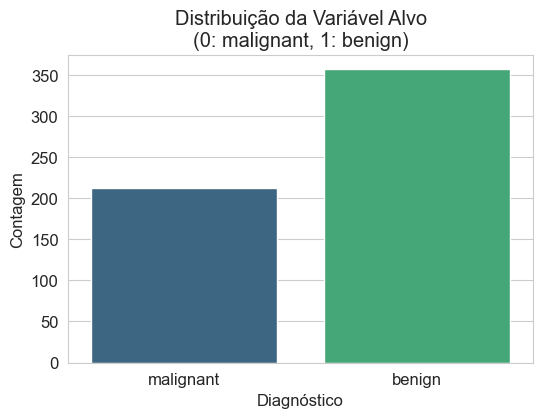

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


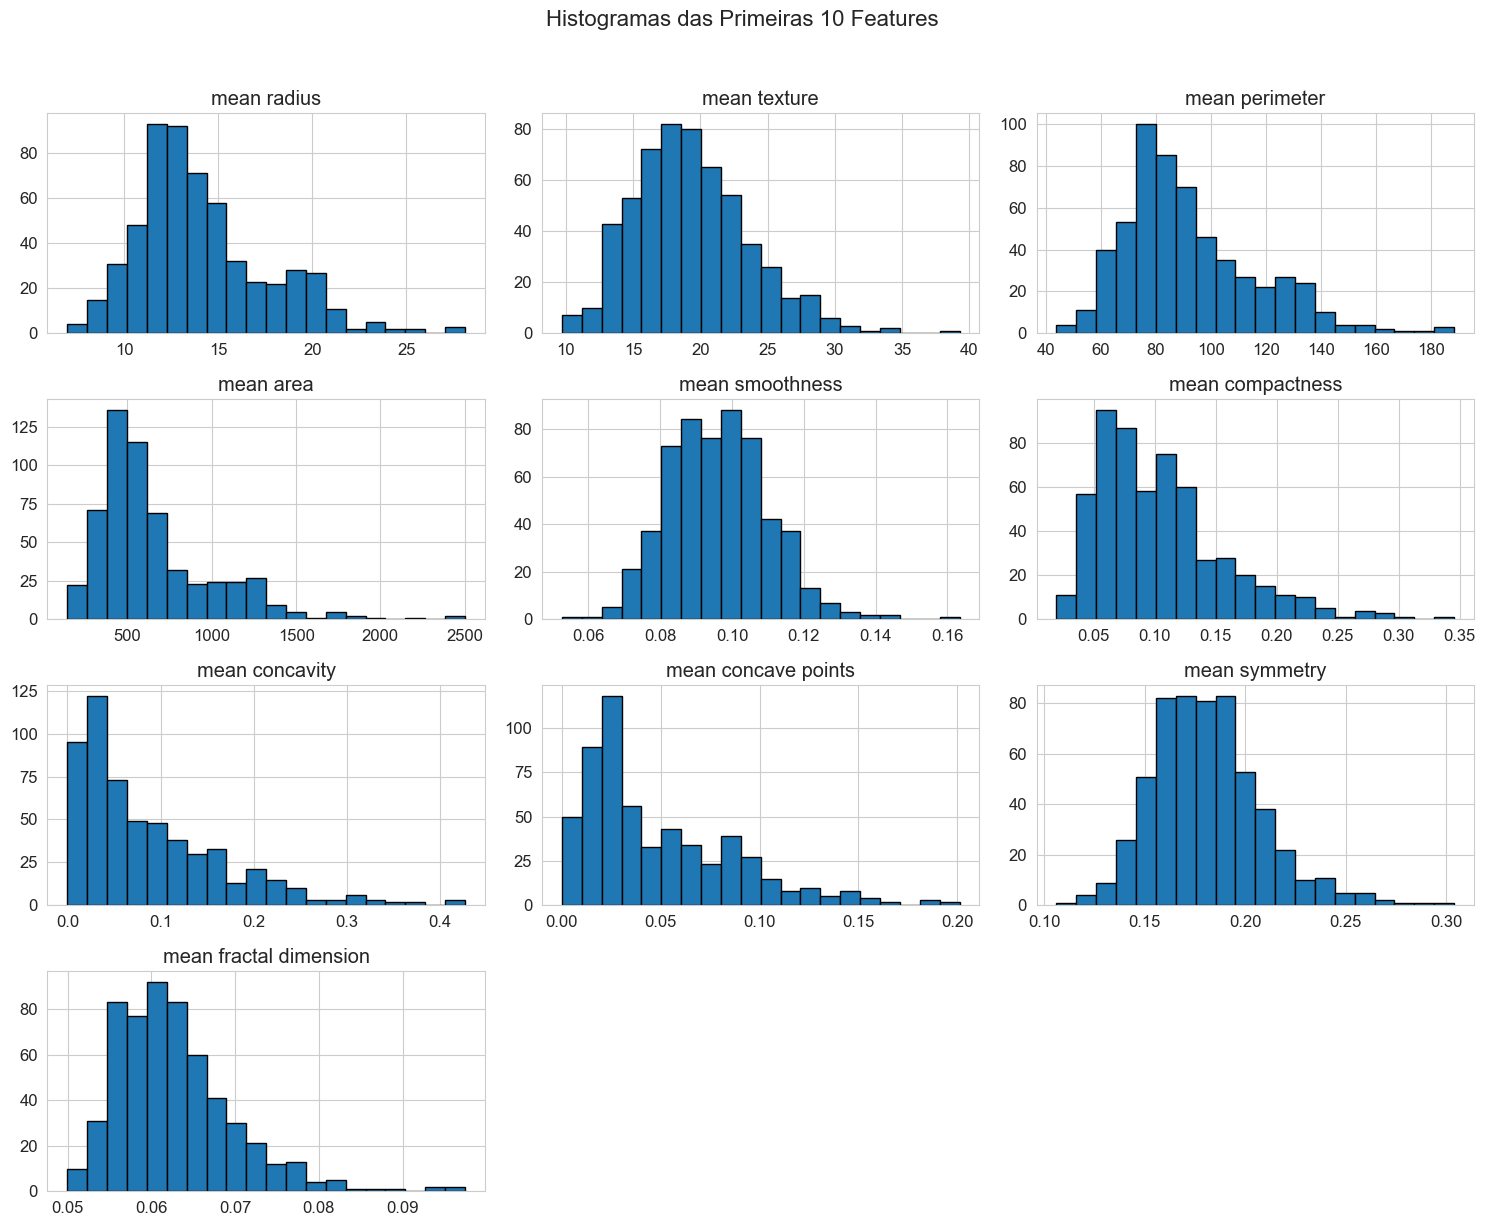

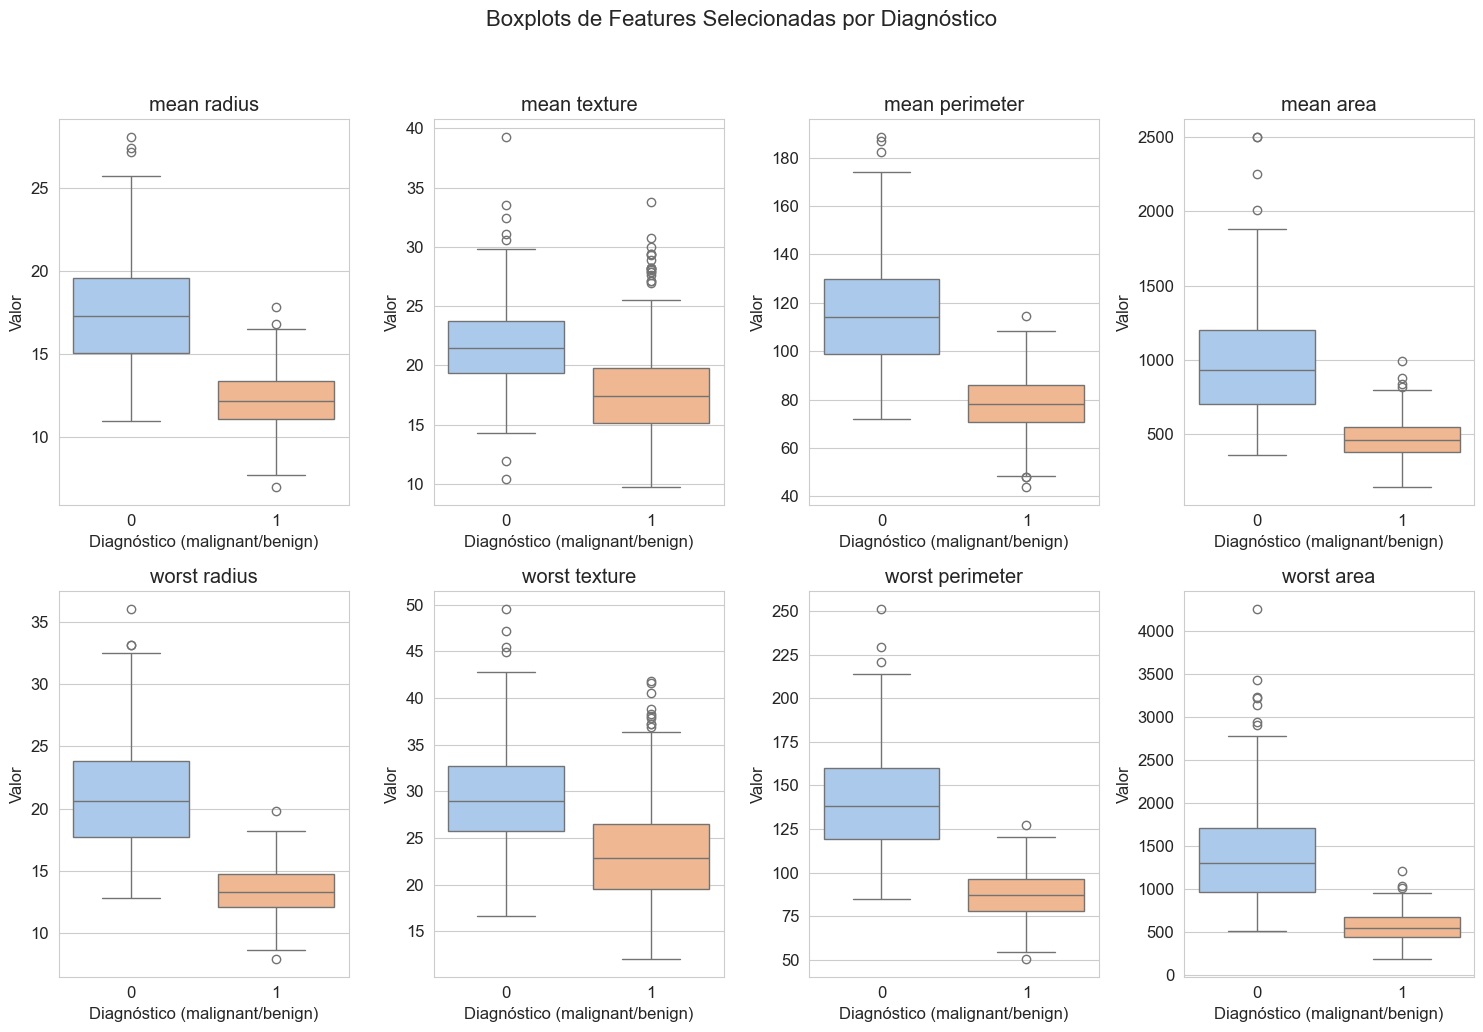

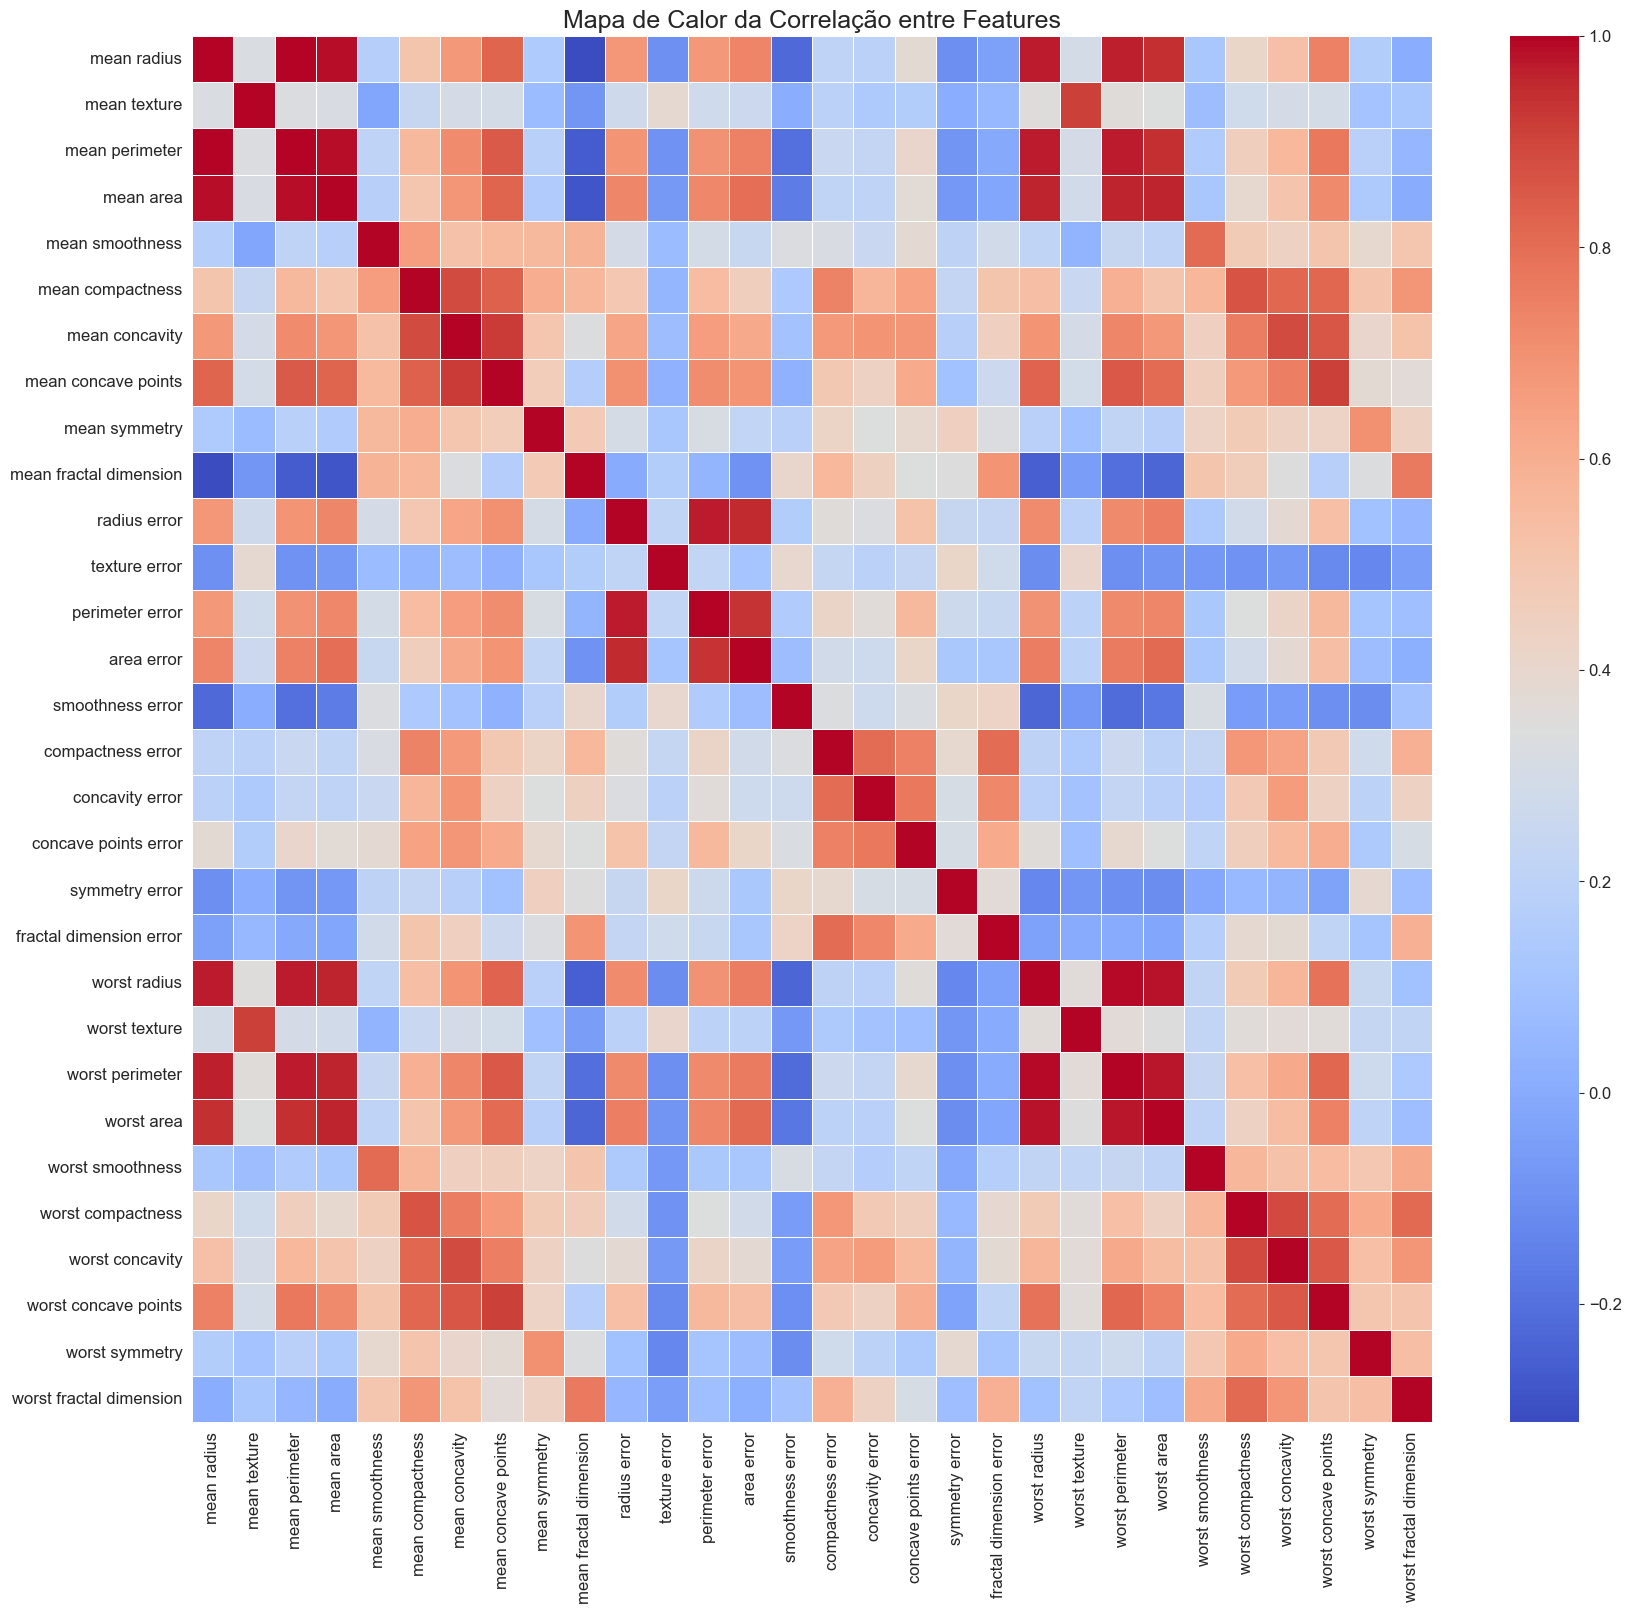


Correlação das features com a variável alvo ('target'):
target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean pe

In [3]:
# Distribuição da variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title(f'Distribuição da Variável Alvo\n(0: {cancer.target_names[0]}, 1: {cancer.target_names[1]})')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=[cancer.target_names[0], cancer.target_names[1]])
plt.show()
print(df['target'].value_counts(normalize=True))

# Histograma de algumas features importantes (exemplo)
# Selecionar algumas features para plotar (as primeiras 10, por exemplo)
features_to_plot = df.columns[:10]
df[features_to_plot].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Histogramas das Primeiras 10 Features', y=1.02, fontsize=16)
plt.tight_layout() # Ajusta o layout para não sobrepor títulos
plt.show()

# Boxplots para visualizar a distribuição e outliers de algumas features em relação à variável alvo
# Selecionar um subconjunto de features para boxplot para não poluir o gráfico
boxplot_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                    'worst radius', 'worst texture', 'worst perimeter', 'worst area']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(boxplot_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='pastel')
    plt.title(feature)
    plt.xlabel(f'Diagnóstico ({cancer.target_names[0]}/{cancer.target_names[1]})')
    plt.ylabel('Valor')
plt.suptitle('Boxplots de Features Selecionadas por Diagnóstico', y=1.03, fontsize=16)
plt.tight_layout()
plt.show()


# Mapa de calor da correlação
# Calcular a matriz de correlação apenas para features numéricas (excluindo 'target' temporariamente para o cálculo)
correlation_matrix = df.drop('target', axis=1).corr()
plt.figure(figsize=(20, 18)) # Aumentar o tamanho para melhor visualização
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.1f', linewidths=0.5) # annot=False para não poluir com 30x30 anotações
plt.title('Mapa de Calor da Correlação entre Features', fontsize=18)
plt.show()

# Mostrar correlações mais altas com a variável alvo
target_correlations = df.corr()['target'].sort_values(ascending=False)
print("\nCorrelação das features com a variável alvo ('target'):")
print(target_correlations)

## 🛠️ 6. Pré-processamento dos Dados

O pré-processamento dos dados é uma etapa crucial para preparar os dados para os algoritmos de Machine Learning. Para o dataset `load_breast_cancer`:
1.  **Verificação de Dados Ausentes:** O dataset já vem limpo, sem valores ausentes.
2.  **Encoding de Variáveis Categóricas:** Todas as features já são numéricas.
3.  **Padronização das Features:** Como vamos comparar XGBoost com SVM (que é sensível à escala das features) e para garantir uma performance ótima para alguns aspectos do XGBoost, vamos padronizar as features para terem média 0 e desvio padrão 1.

Separaremos as features (X) da variável alvo (y) antes de aplicar a padronização.

In [4]:
# Classe para remoção de outliers usando o método do IQR (Intervalo Interquartil)
class OutlierRemover(BaseEstimator, TransformerMixin):
    """
    Substitui valores outliers pelo limite inferior/superior usando o método do IQR (Intervalo Interquartil).
    Para cada feature, calcula Q1 e Q3 no fit e faz o clipping dos valores fora de [Q1 - 1.5*IQR, Q3 + 1.5*IQR] no transform.

    Parâmetros:
    ----------
    Nenhum parâmetro adicional além dos herdados de BaseEstimator e TransformerMixin.

    Métodos:
    -------
    fit(X, y=None):
        Calcula Q1, Q3 e IQR para cada coluna de X.
    transform(X):
        Faz o clipping dos valores de X para o intervalo permitido.
    """
    def fit(self, X, y=None):
        self.q1_ = np.percentile(X, 25, axis=0)
        self.q3_ = np.percentile(X, 75, axis=0)
        self.iqr_ = self.q3_ - self.q1_
        self.lower_ = self.q1_ - 1.5 * self.iqr_
        self.upper_ = self.q3_ + 1.5 * self.iqr_
        return self

    def transform(self, X, return_mask=False):
        """
        Faz o clipping dos valores de X para o intervalo [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

        Parâmetros:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dados de entrada.
        return_mask : bool, default=False
            Não utilizado nesta versão, mantido para compatibilidade.

        Retorna:
        -------
        X_clipped : array-like
            Dados com outliers substituídos pelos limites.
        """
        X_clipped = np.clip(X, self.lower_, self.upper_)
        if return_mask:
            # Mantém compatibilidade, mas não faz sentido para clipping
            mask = np.ones(X.shape[0], dtype=bool)
            return X_clipped, mask
        return X_clipped

# Função de aumento de dados (augmentation) com ruído gaussiano
def augment_with_noise(X, y, mean=0.0, std=0.01, random_state=42):
    """
    Realiza data augmentation adicionando ruído gaussiano aos dados de entrada.

    Parâmetros:
    ----------
    X : array-like, shape (n_samples, n_features)
        Dados de entrada originais.
    y : array-like, shape (n_samples,)
        Rótulos correspondentes.
    mean : float, default=0.0
        Média do ruído gaussiano.
    std : float, default=0.01
        Desvio padrão do ruído gaussiano.
    random_state : int ou RandomState, default=42
        Semente para reprodutibilidade.

    Retorna:
    -------
    X_aug : array-like, shape (2*n_samples, n_features)
        Dados originais e aumentados.
    y_aug : array-like, shape (2*n_samples,)
        Rótulos duplicados para os dados aumentados.
    """
    rng = check_random_state(random_state)
    noise = rng.normal(loc=mean, scale=std, size=X.shape)
    X_noisy = X + noise
    y_noisy = y.copy()
    X_aug = np.vstack([X, X_noisy])
    y_aug = np.hstack([y, y_noisy])
    return X_aug, y_aug

In [5]:
# # Verificar valores ausentes por coluna
# print("\nValores ausentes no dataset:")
# missing_values = df.isnull().sum()
# missing_values = missing_values[missing_values > 0]
# print(missing_values)

# Separar features (X) e variável alvo (y)
X = df.drop('target', axis=1)
y = df['target']

print("Shape de X (features):", X.shape)
print("Shape de y (alvo):", y.shape)

# Divisão em treino e teste com random_state padronizado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Remoção de valores faltantes
X_train = pd.DataFrame(X_train).dropna().values
X_test = pd.DataFrame(X_test).dropna().values

# Verificando o tamanho dos conjuntos de dados após a divisão
print("Tamanho do conjunto de treino X:", X_train.shape[0])
print("Tamanho do conjunto de treino y:", y_train.shape[0])
print("Tamanho do conjunto de teste X:", X_test.shape[0])
print("Tamanho do conjunto de teste y:", y_test.shape[0])

# Substituir outliers
outlier_remover = OutlierRemover()
outlier_remover.fit(X_train)
X_train_out, mask_train = outlier_remover.transform(X_train, return_mask=True)
y_train_out = y_train[mask_train]
X_test_out, mask_test = outlier_remover.transform(X_test, return_mask=True)
y_test_out = y_test[mask_test]

# Verificando o tamanho dos conjuntos de dados após a remoção de outliers
print("Tamanho do conjunto de treino X após remoção de outliers:", X_train_out.shape[0])
print("Tamanho do conjunto de treino y após remoção de outliers:", y_train_out.shape[0])
print("Tamanho do conjunto de teste X após remoção de outliers:", X_test_out.shape[0])
print("Tamanho do conjunto de teste y após remoção de outliers:", y_test_out.shape[0])

# Aumento de dados
X_train_aug, y_train_aug = augment_with_noise(X_train_out, y_train_out, mean=0.0, std=0.01, random_state=42)

# Verificando o tamanho dos conjuntos de dados após o aumento
print("Tamanho do conjunto de treino X após aumento:", X_train_aug.shape[0])
print("Tamanho do conjunto de treino y após aumento:", y_train_aug.shape[0])

# Padronização das features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_aug)
X_test_norm = scaler.transform(X_test_out)

# Converter de volta para DataFrame para manter os nomes das colunas (útil para SHAP e análise)
# X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)
# Verificando o tamanho dos conjuntos de dados após a normalização
print("Tamanho do conjunto de treino X após normalização:", X_train_norm.shape[0])
print("Tamanho do conjunto de treino y após normalização:", y_train_aug.shape[0])
print("Tamanho do conjunto de teste X após normalização:", X_test_norm.shape[0])
print("Tamanho do conjunto de teste y após normalização:", y_test_out.shape[0])

print("\nDescrição estatística das features padronizadas (média próxima de 0, desvio padrão próximo de 1):")
# Converter array para DataFrame usando as colunas originais (todos exceto 'target')
X_train_norm_df = pd.DataFrame(X_train_norm, columns=df.drop('target', axis=1).columns)
display(X_train_norm_df.describe().T)

Shape de X (features): (569, 30)
Shape de y (alvo): (569,)
Tamanho do conjunto de treino X: 455
Tamanho do conjunto de treino y: 455
Tamanho do conjunto de teste X: 114
Tamanho do conjunto de teste y: 114
Tamanho do conjunto de treino X após remoção de outliers: 455
Tamanho do conjunto de treino y após remoção de outliers: 455
Tamanho do conjunto de teste X após remoção de outliers: 114
Tamanho do conjunto de teste y após remoção de outliers: 114
Tamanho do conjunto de treino X após aumento: 910
Tamanho do conjunto de treino y após aumento: 910
Tamanho do conjunto de treino X após normalização: 910
Tamanho do conjunto de treino y após normalização: 910
Tamanho do conjunto de teste X após normalização: 114
Tamanho do conjunto de teste y após normalização: 114

Descrição estatística das features padronizadas (média próxima de 0, desvio padrão próximo de 1):
Tamanho do conjunto de treino X: 455
Tamanho do conjunto de treino y: 455
Tamanho do conjunto de teste X: 114
Tamanho do conjunto de

,count,mean,std,min,25%,50%,75%,max
mean radius,910.0,-2.596214e-15,1.00055,-2.106317,-0.712715,-0.222199,0.518871,2.367529
mean texture,910.0,-4.712226e-15,1.00055,-2.227507,-0.754254,-0.092522,0.589717,2.599784
mean perimeter,910.0,1.378141e-15,1.00055,-2.057407,-0.714202,-0.225702,0.543337,2.430788
mean area,910.0,-1.770501e-15,1.00055,-1.627947,-0.724680,-0.304678,0.459333,2.219827
mean smoothness,910.0,6.890703e-16,1.00055,-3.048715,-0.725049,-0.033015,0.654948,2.915825
mean compactness,910.0,2.654775e-16,1.00055,-1.662971,-0.796429,-0.188972,0.563606,2.938114
mean concavity,910.0,5.348591e-16,1.00055,-1.396621,-0.773541,-0.362222,0.588175,2.863255
mean concave points,910.0,7.007825e-16,1.00055,-1.655422,-0.755669,-0.366606,0.663943,3.171905
mean symmetry,910.0,8.440623e-15,1.00055,-3.256682,-0.711973,-0.071883,0.578760,2.704686
mean fractal dimension,910.0,-2.883164e-15,1.00055,-3.729215,-0.639240,-0.099753,0.616807,3.760339


## ✂️ 7. Divisão dos Dados & Estratégia de Validação

Para avaliar o desempenho dos nossos modelos de forma imparcial, dividiremos o dataset em duas partes:
-   **Conjunto de Treino:** Usado para treinar os modelos.
-   **Conjunto de Teste:** Usado para avaliar o desempenho final dos modelos em dados não vistos.

Utilizaremos `train_test_split` do `scikit-learn`. É importante usar o parâmetro `stratify=y` para garantir que a proporção das classes da variável alvo seja mantida tanto no conjunto de treino quanto no de teste, o que é crucial para datasets desbalanceados (embora o nosso seja relativamente balanceado).

Para a otimização de hiperparâmetros e uma avaliação mais robusta durante o desenvolvimento, definiremos uma estratégia de validação cruzada, como `StratifiedKFold`.

In [6]:
print(f"Shape de X_train: {X_train_norm.shape}, Shape de y_train: {y_train_aug.shape}")
print(f"Shape de X_test: {X_test_norm.shape}, Shape de y_test: {y_test_out.shape}")

print(f"\nProporção da classe 1 (Benigno) em y_train: {y_train_aug.mean():.2f}")
print(f"Proporção da classe 1 (Benigno) em y_test: {y_test_out.mean():.2f}")

# Definir a estratégia de validação cruzada (K-Fold Estratificado)
# Usaremos 5 folds. shuffle=True para embaralhar os dados antes de dividir.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f"\nEstratégia de Validação Cruzada: {cv_strategy}")

Shape de X_train: (910, 30), Shape de y_train: (910,)
Shape de X_test: (114, 30), Shape de y_test: (114,)

Proporção da classe 1 (Benigno) em y_train: 0.63
Proporção da classe 1 (Benigno) em y_test: 0.63

Estratégia de Validação Cruzada: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


## 🏁 8. Modelos de Referência (Baselines)

Antes de mergulharmos no XGBoost, é uma boa prática estabelecer modelos de referência (baselines) para termos um ponto de comparação. Vamos treinar e avaliar dois modelos comuns:
1.  **Naive Bayes (Gaussiano):** Um classificador probabilístico simples e rápido.
2.  **Support Vector Machine (SVM) com kernel RBF:** Um classificador poderoso que busca a melhor margem de separação entre classes. Para o SVM, faremos uma busca simples por hiperparâmetros (C e gamma) usando `GridSearchCV`.

As métricas de avaliação incluirão Acurácia, AUC-ROC, Relatório de Classificação (Precisão, Recall, F1-Score) e Matriz de Confusão.

--- Treinando Modelo Baseline: Naive Bayes (Gaussiano) ---
Naive Bayes - Acurácia: 0.9298
Naive Bayes - AUC-ROC: 0.9868
Naive Bayes - F1-Score (Macro): 0.9246

Relatório de Classificação - Naive Bayes:
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



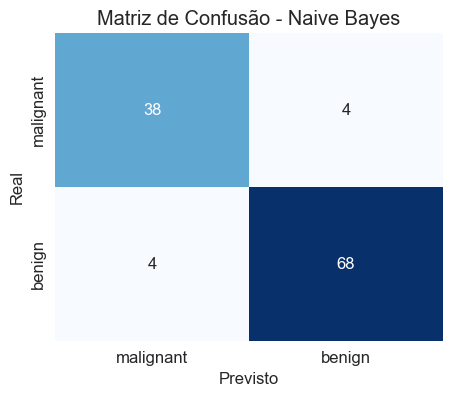

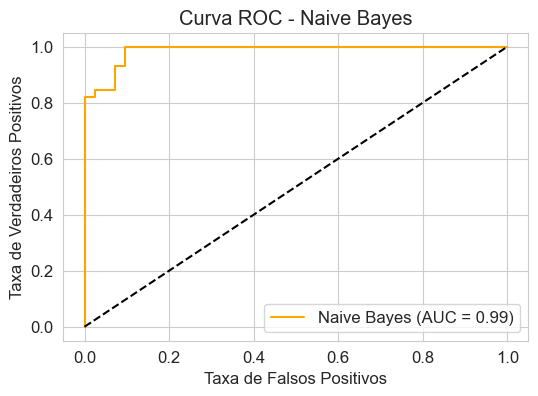


--- Treinando Modelo Baseline: SVM (RBF) com GridSearchCV ---
Melhores Parâmetros para SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
SVM (RBF) - Acurácia: 0.9825
SVM (RBF) - AUC-ROC: 0.9944
SVM (RBF) - F1-Score (Macro): 0.9812

Relatório de Classificação - SVM (RBF):
Melhores Parâmetros para SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
SVM (RBF) - Acurácia: 0.9825
SVM (RBF) - AUC-ROC: 0.9944
SVM (RBF) - F1-Score (Macro): 0.9812

Relatório de Classificação - SVM (RBF):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99

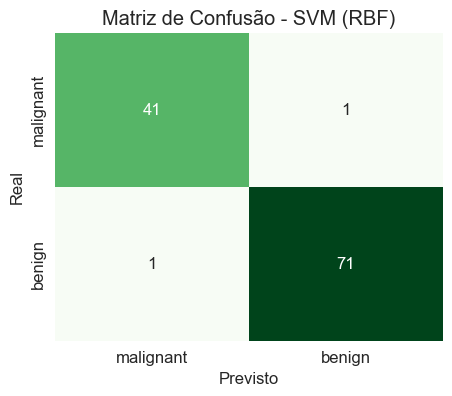

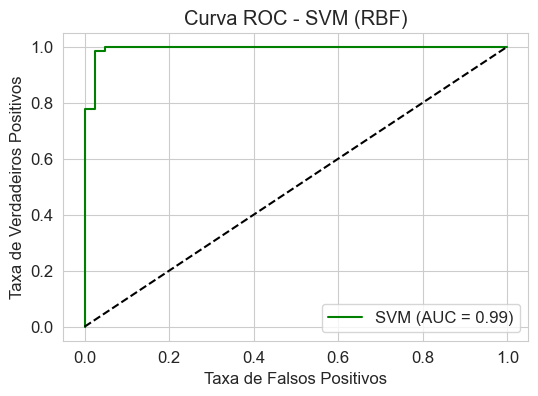

In [7]:
# Lista para armazenar as métricas de todos os modelos para comparação final
all_model_metrics = []

# --- Baseline 1: Naive Bayes (Gaussiano) ---
print("--- Treinando Modelo Baseline: Naive Bayes (Gaussiano) ---")
nb_model = GaussianNB()
nb_model.fit(X_train_norm, y_train_aug)

# Previsões
y_pred_nb = nb_model.predict(X_test_norm)
y_proba_nb = nb_model.predict_proba(X_test_norm)[:, 1] # Probabilidades para a classe positiva (1)

# Avaliação
accuracy_nb = accuracy_score(y_test_out, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test_out, y_proba_nb)
f1_macro_nb = f1_score(y_test_out, y_pred_nb, average='macro')

print(f"Naive Bayes - Acurácia: {accuracy_nb:.4f}")
print(f"Naive Bayes - AUC-ROC: {roc_auc_nb:.4f}")
print(f"Naive Bayes - F1-Score (Macro): {f1_macro_nb:.4f}")
print("\nRelatório de Classificação - Naive Bayes:")
print(classification_report(y_test_out, y_pred_nb, target_names=cancer.target_names))

# Matriz de Confusão
cm_nb = confusion_matrix(y_test_out, y_pred_nb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Matriz de Confusão - Naive Bayes')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test_out, y_proba_nb)
plt.figure(figsize=(6,4))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()

all_model_metrics.append({'model': 'Naive Bayes', 'accuracy': accuracy_nb, 'roc_auc': roc_auc_nb, 'f1_score_macro': f1_macro_nb})

# --- Baseline 2: SVM (RBF) com GridSearchCV ---
print("\n--- Treinando Modelo Baseline: SVM (RBF) com GridSearchCV ---")
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1],
                  'kernel': ['rbf'],
                  'probability': [True]} # Necessário para predict_proba

svm_grid_search = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=0)
svm_grid_search.fit(X_train_norm, y_train_aug)

best_svm_model = svm_grid_search.best_estimator_
print(f"Melhores Parâmetros para SVM: {svm_grid_search.best_params_}")

# Previsões
y_pred_svm = best_svm_model.predict(X_test_norm)
y_proba_svm = best_svm_model.predict_proba(X_test_norm)[:, 1]

# Avaliação
accuracy_svm = accuracy_score(y_test_out, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test_out, y_proba_svm)
f1_macro_svm = f1_score(y_test_out, y_pred_svm, average='macro')

print(f"SVM (RBF) - Acurácia: {accuracy_svm:.4f}")
print(f"SVM (RBF) - AUC-ROC: {roc_auc_svm:.4f}")
print(f"SVM (RBF) - F1-Score (Macro): {f1_macro_svm:.4f}")
print("\nRelatório de Classificação - SVM (RBF):")
print(classification_report(y_test_out, y_pred_svm, target_names=cancer.target_names))

# Matriz de Confusão
cm_svm = confusion_matrix(y_test_out, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Matriz de Confusão - SVM (RBF)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test_out, y_proba_svm)
plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - SVM (RBF)')
plt.legend()
plt.show()

all_model_metrics.append({'model': 'SVM (RBF)', 'accuracy': accuracy_svm, 'roc_auc': roc_auc_svm, 'f1_score_macro': f1_macro_svm})

## 🚀 9. Treinamento XGBoost (Básico)

Agora, vamos treinar nosso primeiro modelo XGBoost. Começaremos com uma configuração básica, utilizando os parâmetros padrão do `XGBClassifier` ou alguns valores iniciais comuns. Isso nos dará um primeiro resultado para o XGBoost, que depois tentaremos otimizar.

Principais hiperparâmetros a considerar inicialmente:
-   `n_estimators`: Número de árvores (rodadas de boosting).
-   `learning_rate` (ou `eta`): Taxa de aprendizado, controla o peso de cada nova árvore.
-   `max_depth`: Profundidade máxima de cada árvore.
-   `use_label_encoder=False`: Para evitar um warning comum com versões recentes do XGBoost.
-   `eval_metric='logloss'`: Métrica de avaliação para problemas de classificação binária durante o treinamento (se `early_stopping` for usado).

--- Treinando Modelo XGBoost (Básico) ---
XGBoost (Básico) - Acurácia: 0.9474
XGBoost (Básico) - AUC-ROC: 0.9940
XGBoost (Básico) - F1-Score (Macro): 0.9429

Relatório de Classificação - XGBoost (Básico):
              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

XGBoost (Básico) - Acurácia: 0.9474
XGBoost (Básico) - AUC-ROC: 0.9940
XGBoost (Básico) - F1-Score (Macro): 0.9429

Relatório de Classificação - XGBoost (Básico):
              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95

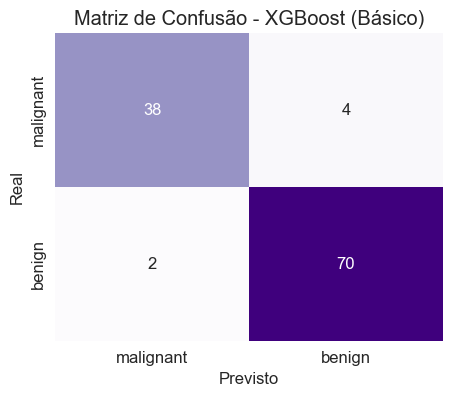

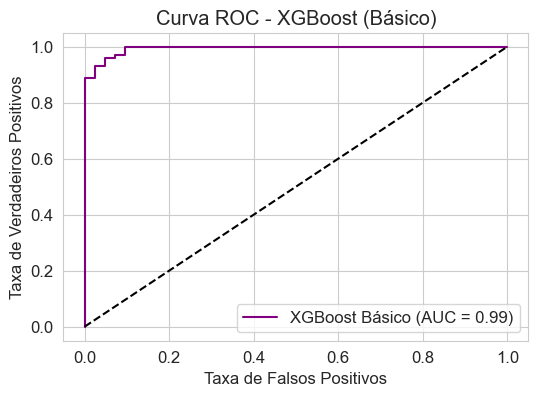

In [8]:
print("--- Treinando Modelo XGBoost (Básico) ---")
xgb_basic_model = xgb.XGBClassifier(
    n_estimators=100,      # Número de árvores
    learning_rate=0.1,     # Taxa de aprendizado
    max_depth=3,           # Profundidade máxima
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # Métrica para avaliação interna (ex: com early stopping)
)

xgb_basic_model.fit(X_train_norm, y_train_aug)

# Previsões
y_pred_xgb_basic = xgb_basic_model.predict(X_test_norm)
y_proba_xgb_basic = xgb_basic_model.predict_proba(X_test_norm)[:, 1]

# Avaliação
accuracy_xgb_basic = accuracy_score(y_test_out, y_pred_xgb_basic)
roc_auc_xgb_basic = roc_auc_score(y_test_out, y_proba_xgb_basic)
f1_macro_xgb_basic = f1_score(y_test_out, y_pred_xgb_basic, average='macro')

print(f"XGBoost (Básico) - Acurácia: {accuracy_xgb_basic:.4f}")
print(f"XGBoost (Básico) - AUC-ROC: {roc_auc_xgb_basic:.4f}")
print(f"XGBoost (Básico) - F1-Score (Macro): {f1_macro_xgb_basic:.4f}")
print("\nRelatório de Classificação - XGBoost (Básico):")
print(classification_report(y_test_out, y_pred_xgb_basic, target_names=cancer.target_names))

# Matriz de Confusão
cm_xgb_basic = confusion_matrix(y_test_out, y_pred_xgb_basic)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb_basic, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Matriz de Confusão - XGBoost (Básico)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_xgb_basic, tpr_xgb_basic, _ = roc_curve(y_test_out, y_proba_xgb_basic)
plt.figure(figsize=(6,4))
plt.plot(fpr_xgb_basic, tpr_xgb_basic, label=f'XGBoost Básico (AUC = {roc_auc_xgb_basic:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Básico)')
plt.legend()
plt.show()

all_model_metrics.append({'model': 'XGBoost (Básico)', 'accuracy': accuracy_xgb_basic, 'roc_auc': roc_auc_xgb_basic, 'f1_score_macro': f1_macro_xgb_basic})

## 🧪 10. Busca de Hiperparâmetros para XGBoost com `RandomizedSearchCV`

Para otimizar o desempenho do XGBoost, é crucial ajustar seus hiperparâmetros. Em vez de uma busca exaustiva com `GridSearchCV` (que pode ser muito custosa computacionalmente com muitos parâmetros), utilizaremos `RandomizedSearchCV`. Esta técnica amostra um número fixo de combinações de parâmetros de distribuições especificadas, sendo mais eficiente para explorar um grande espaço de busca.

Vamos definir um "grid" (ou melhor, distribuições) de parâmetros para os hiperparâmetros mais influentes do XGBoost e deixar o `RandomizedSearchCV` encontrar uma boa combinação usando nossa estratégia de validação cruzada (`cv_strategy`).

Após encontrar os melhores parâmetros, treinaremos um modelo final com essa configuração e também implementaremos `early stopping`. O `early stopping` monitora uma métrica de validação (ex: `logloss` no conjunto de teste) e para o treinamento se essa métrica não melhorar após um certo número de rodadas (`early_stopping_rounds`), prevenindo overfitting e potencialmente encontrando um número ótimo de `n_estimators`.

In [9]:
# Definir o espaço de busca de hiperparâmetros
param_dist_xgb = {
    'objective': ['reg:squarederror', 'binary:logistic'],
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.25, 0.5, 1, 2],
    'min_child_weight': [1, 3, 5, 7, 9],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

# Configurar RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist_xgb,
    n_iter=1000,
    cv=cv_strategy,
    scoring='roc_auc', 
    random_state=42,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
xgb_random_search.fit(X_train_norm, y_train_aug)
end_time = time.time()

print(f"Tempo de RandomizedSearchCV: {(end_time - start_time):.2f} segundos")
print("Melhores parâmetros:", xgb_random_search.best_params_)
print(f"Melhor Score AUC (Validação Cruzada): {xgb_random_search.best_score_:.4f}")

# Preparar para early stopping utilizando a API nativa do XGBoost
best_xgb_params = xgb_random_search.best_params_
print("\nIniciando treinamento com early stopping (API nativa).")
print("Hiperparâmetros obtidos:", best_xgb_params)

# Preparar DMatrix para treino e validação
dtrain = xgb.DMatrix(X_train_norm, label=y_train_aug)
deval = xgb.DMatrix(X_test_norm, label=y_test_out)

# Mapeamento de parâmetros do sklearn para a API nativa
params_native_api = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': 42
}
param_mapping = {
    'learning_rate': 'eta',
    'reg_alpha': 'alpha',
    'reg_lambda': 'lambda',
    'max_depth': 'max_depth',
    'subsample': 'subsample',
    'colsample_bytree': 'colsample_bytree',
    'gamma': 'gamma',
    'min_child_weight': 'min_child_weight'
}

for sk_param, native_param in param_mapping.items():
    if sk_param in best_xgb_params:
        params_native_api[native_param] = best_xgb_params[sk_param]

num_boost_round_max = 2000
print("\nParâmetros para xgb.train:", params_native_api)

# Treinamento com early stopping
watchlist = [(dtrain, 'train'), (deval, 'eval')]
native_model = xgb.train(
    params_native_api,
    dtrain,
    num_boost_round=num_boost_round_max,
    evals=watchlist,
    early_stopping_rounds=50,
    verbose_eval=50
)

best_num_rounds = native_model.best_iteration
print(f"\nMelhor número de rodadas: {best_num_rounds}")

# Treinar o classificador final definindo n_estimators com o número de rounds ideal
final_classifier_params = best_xgb_params.copy()
final_classifier_params['n_estimators'] = best_num_rounds
# Remove parâmetros que não são necessários no construtor
for key in ['use_label_encoder', 'early_stopping_rounds', 'eval_set']:
    final_classifier_params.pop(key, None)

print("\nParâmetros para XGBClassifier final:", final_classifier_params)
xgb_tuned_model = xgb.XGBClassifier(**final_classifier_params, random_state=42)

print("\nTreinando o XGBClassifier final...")
xgb_tuned_model.fit(X_train_norm, y_train_aug)
print("\nModelo final treinado com sucesso.")

# Exemplo de previsão
print("\nPrevisões de exemplo (primeiras 3 amostras):", xgb_tuned_model.predict(X_test_norm[:3]))
print("Probabilidades de exemplo (primeiras 3 amostras):", xgb_tuned_model.predict_proba(X_test_norm[:3]))


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Tempo de RandomizedSearchCV: 3659.73 segundos
Melhores parâmetros: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'min_child_weight': 9, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Melhor Score AUC (Validação Cruzada): 0.9993

Iniciando treinamento com early stopping (API nativa).
Hiperparâmetros obtidos: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'min_child_weight': 9, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}

Parâmetros para xgb.train: {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'seed': 42, 'eta': 0.1, 'alpha': 0, 'lambda': 1, 'max_depth': 3, 'subsample': 0.8, 'colsample_bytree': 0.6, 'gamma': 0, 'min_child_weight': 9}
[0]	train-logloss:0.58460	eval-logloss:0.58351
[50]	train-logloss:0.06640	eval-logloss:0.10831
[100]	t

## 📈 11. Avaliação Final do Modelo XGBoost Otimizado

Após encontrar os melhores hiperparâmetros com `RandomizedSearchCV` e treinar o modelo final (incorporando `early stopping`), vamos realizar uma avaliação completa no conjunto de teste.

--- Avaliação Final do Modelo XGBoost Otimizado ---
XGBoost Otimizado - Acurácia: 0.9561
XGBoost Otimizado - AUC-ROC: 0.9937
XGBoost Otimizado - F1-Score (Macro): 0.9526

Relatório de Classificação - XGBoost Otimizado:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



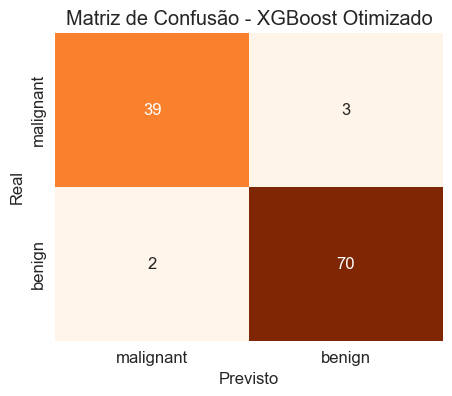

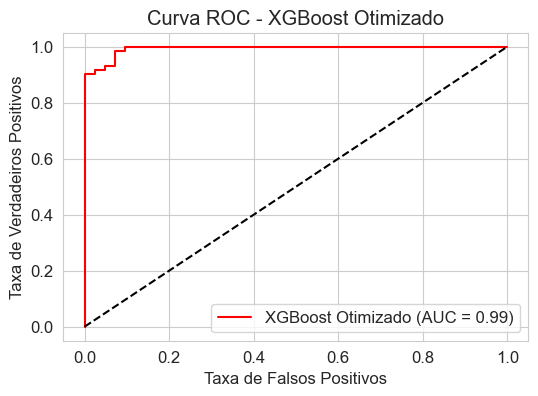

In [10]:
print("--- Avaliação Final do Modelo XGBoost Otimizado ---")
# Previsões com o modelo otimizado
y_pred_xgb_tuned = xgb_tuned_model.predict(X_test_norm)
y_proba_xgb_tuned = xgb_tuned_model.predict_proba(X_test_norm)[:, 1]

# Avaliação
accuracy_xgb_tuned = accuracy_score(y_test_out, y_pred_xgb_tuned)
roc_auc_xgb_tuned = roc_auc_score(y_test_out, y_proba_xgb_tuned)
f1_macro_xgb_tuned = f1_score(y_test_out, y_pred_xgb_tuned, average='macro')

print(f"XGBoost Otimizado - Acurácia: {accuracy_xgb_tuned:.4f}")
print(f"XGBoost Otimizado - AUC-ROC: {roc_auc_xgb_tuned:.4f}")
print(f"XGBoost Otimizado - F1-Score (Macro): {f1_macro_xgb_tuned:.4f}")
print("\nRelatório de Classificação - XGBoost Otimizado:")
print(classification_report(y_test_out, y_pred_xgb_tuned, target_names=cancer.target_names))

# Matriz de Confusão
cm_xgb_tuned = confusion_matrix(y_test_out, y_pred_xgb_tuned)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Matriz de Confusão - XGBoost Otimizado')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test_out, y_proba_xgb_tuned)
plt.figure(figsize=(6,4))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'XGBoost Otimizado (AUC = {roc_auc_xgb_tuned:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost Otimizado')
plt.legend()
plt.show()

all_model_metrics.append({'model': 'XGBoost (Otimizado)', 'accuracy': accuracy_xgb_tuned, 'roc_auc': roc_auc_xgb_tuned, 'f1_score_macro': f1_macro_xgb_tuned})

## 🔍 12. Interpretabilidade do Modelo XGBoost com SHAP

Para entender *como* o modelo XGBoost otimizado está tomando suas decisões e quais features são mais importantes, utilizaremos a biblioteca SHAP (SHapley Additive exPlanations). SHAP é uma abordagem baseada na teoria dos jogos para explicar a saída de qualquer modelo de machine learning.

Vamos gerar:
-   **SHAP Summary Plot (tipo "bar"):** Mostra a importância média global de cada feature.
-   **SHAP Summary Plot (tipo "dot" ou "violin"):** Mostra não apenas a importância, mas também o impacto de cada feature (valores altos/baixos da feature e seu efeito na predição) e a distribuição dos valores SHAP.
-   **Feature Importance Plot do XGBoost:** O próprio XGBoost também fornece uma medida de importância das features.


--- Interpretabilidade do XGBoost Otimizado com SHAP ---



Valores SHAP calculados para 114 amostras e 30 features.


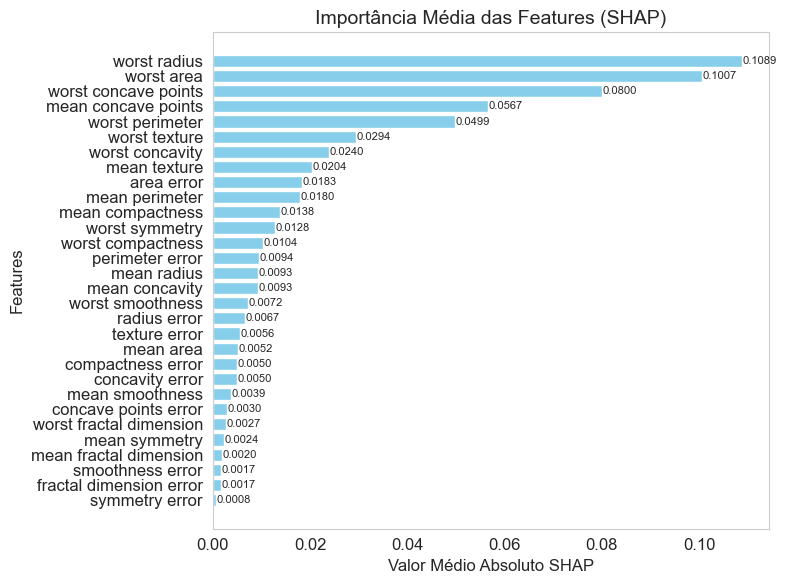

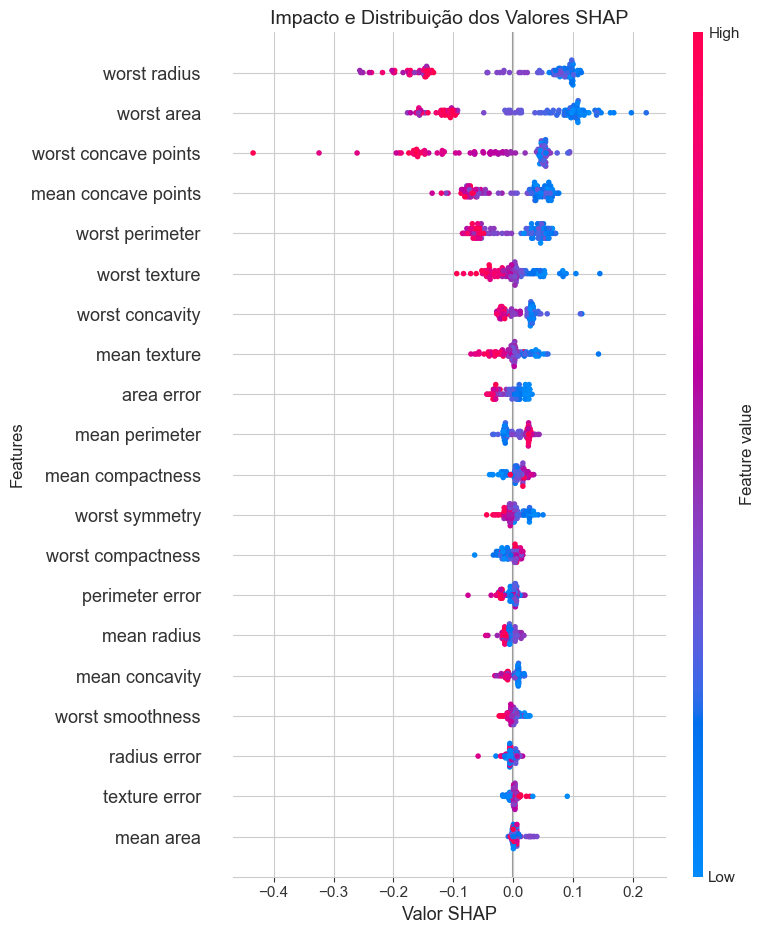

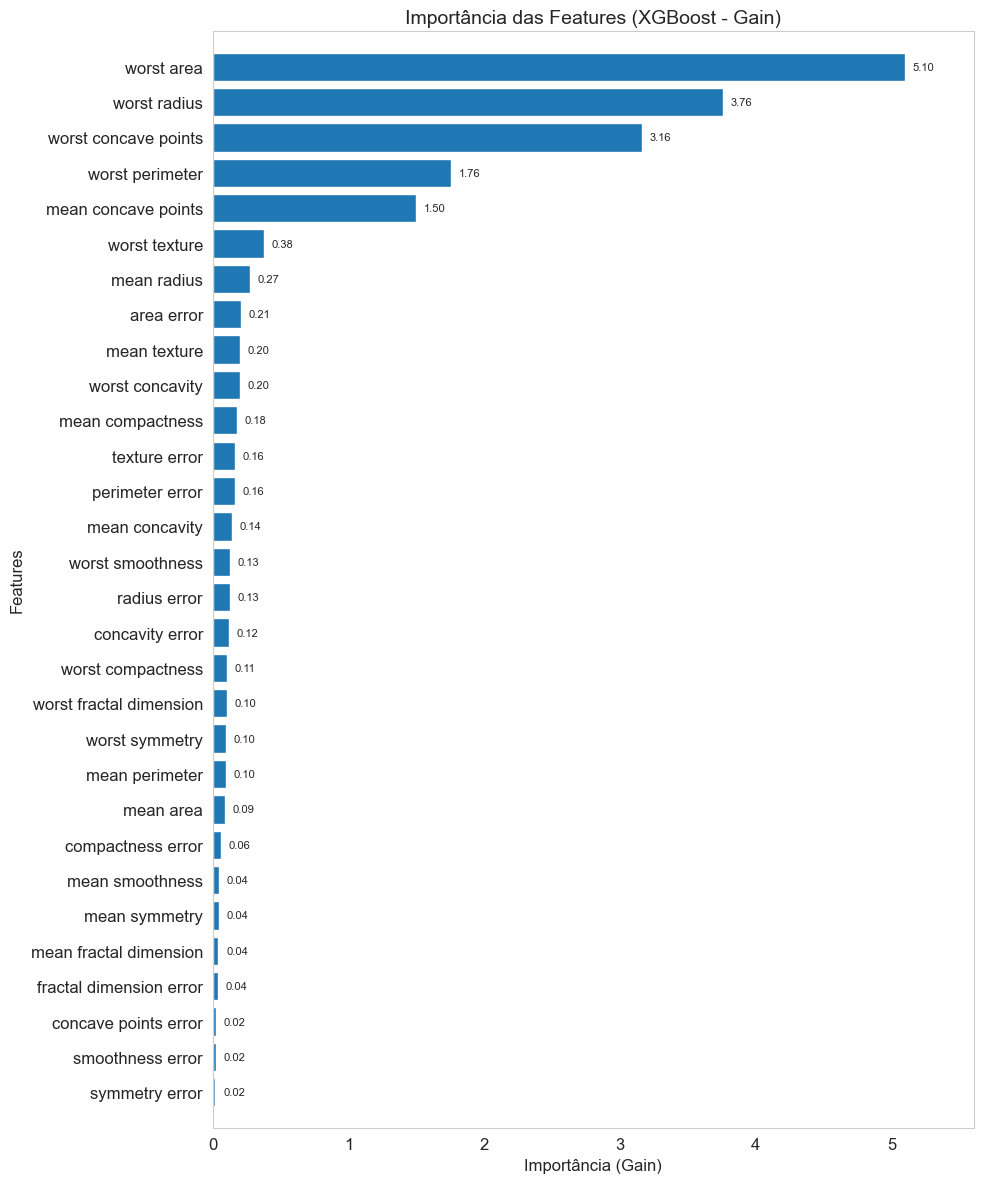

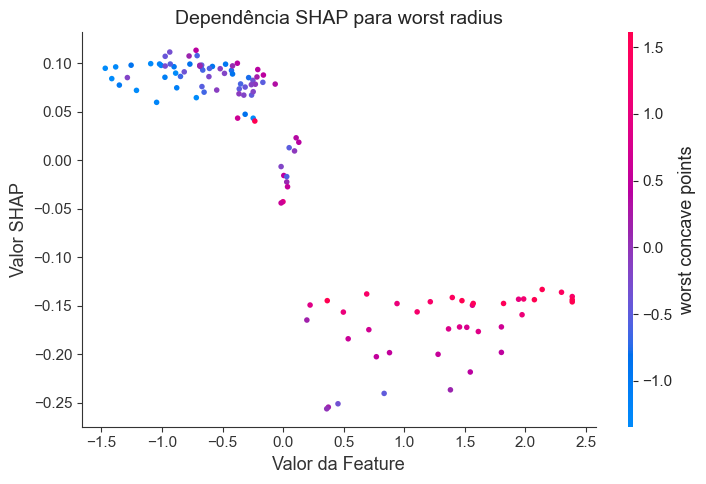

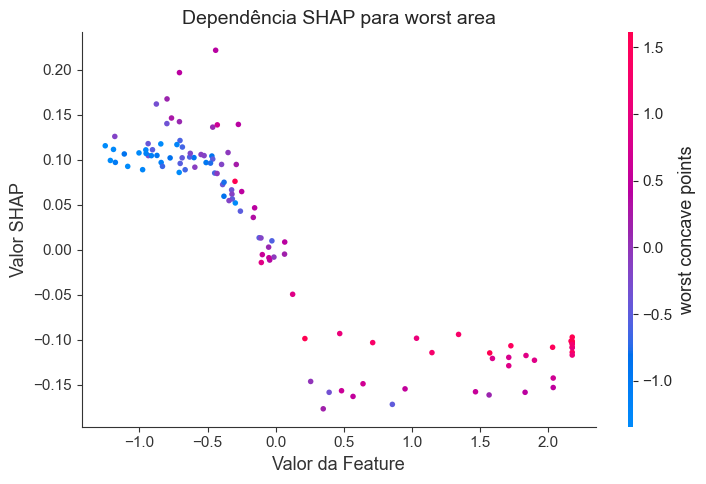

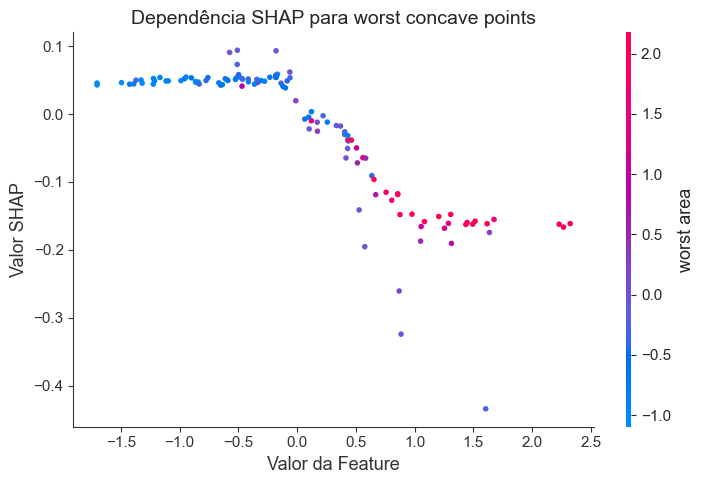

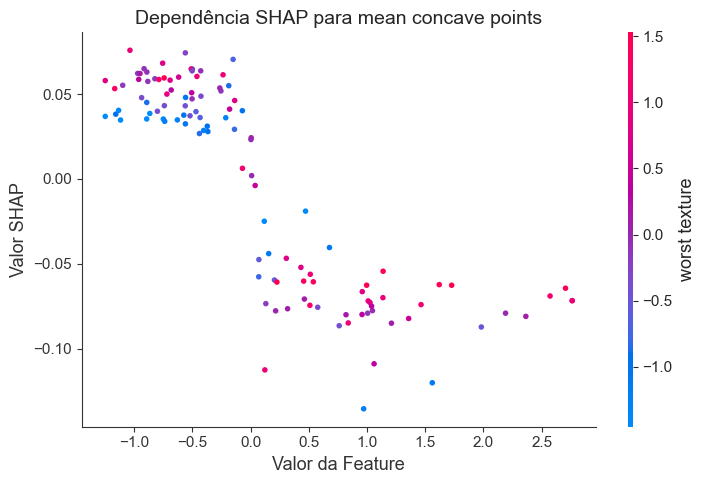

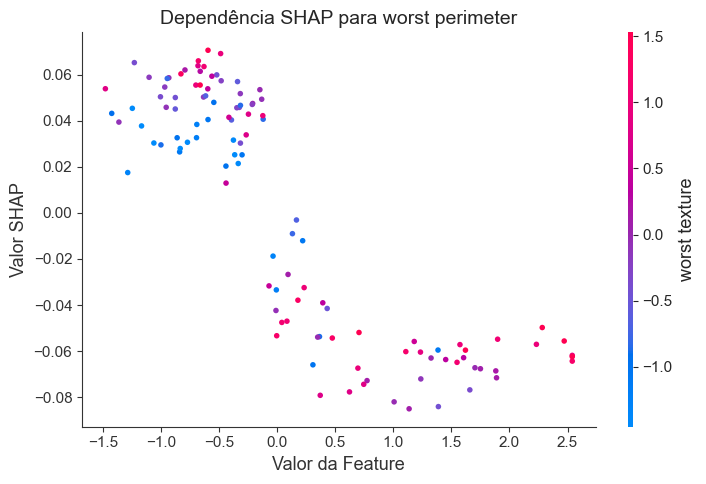

In [11]:
print("\n--- Interpretabilidade do XGBoost Otimizado com SHAP ---")
# Inicializar JS para plots SHAP no notebook (geralmente necessário)
shap.initjs()

# Converter X_test_norm em DataFrame para manter os nomes das features
X_test_norm_df = pd.DataFrame(X_test_norm, columns=df.drop('target', axis=1).columns)

# Criar o explainer SHAP. Para modelos baseados em árvore como XGBoost, TreeExplainer é eficiente.
explainer_xgb_tuned = shap.TreeExplainer(xgb_tuned_model)

# Calcular os valores SHAP para o conjunto de teste
shap_values_xgb_tuned = explainer_xgb_tuned.shap_values(X_test_norm_df)
print(f"\nValores SHAP calculados para {X_test_norm_df.shape[0]} amostras e {X_test_norm_df.shape[1]} features.")

# Calcular e exibir os valores médios absolutos de SHAP
mean_abs_shap_values = np.abs(shap_values_xgb_tuned).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'feature': X_test_norm_df.columns,
    'mean_abs_shap_value': mean_abs_shap_values
})

# Inverter a ordem para que a feature mais importante fique no topo
plot_df = shap_importance_df.sort_values(by='mean_abs_shap_value', ascending=True)

bars = plt.barh(plot_df['feature'], plot_df['mean_abs_shap_value'], color='skyblue')
plt.xlabel("Valor Médio Absoluto SHAP")
plt.ylabel("Features")
plt.title("Importância Média das Features (SHAP)", fontsize=14)
plt.grid(visible=None) # Desabilitar grid para melhor visualização

# Adicionar rótulos de dados nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.0001,  # Posição x do texto (um pouco à direita da barra)
             bar.get_y() + bar.get_height() / 2, # Posição y do texto (centro da barra)
             f'{width:.4f}', # Texto do rótulo (valor formatado)
             ha='left',   # Alinhamento horizontal
             va='center', # Alinhamento vertical
             fontsize=8) # Tamanho da fonte dos rótulos

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# SHAP Summary Plot (tipo "dot") - Mostra impacto e distribuição
shap.summary_plot(shap_values_xgb_tuned, X_test_norm_df, show=False)
plt.title("Impacto e Distribuição dos Valores SHAP", fontsize=14)
plt.xlabel("Valor SHAP")
plt.ylabel("Features")
plt.tight_layout() # Ajusta o layout para não sobrepor títulos
plt.show()

# Feature Importance plot nativo do XGBoost com rótulos e nome das features
fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(xgb_tuned_model, ax=ax, max_num_features=X_test_norm_df.shape[1],
                    height=0.8, importance_type='gain', show_values=False)

# Mapear os rótulos padrão "fX" para os nomes reais das features
y_tick_labels = [item.get_text() for item in ax.get_yticklabels()]
mapped_labels = []
for label in y_tick_labels:
    if label.startswith('f'):
        idx = int(label[1:])  # extrair o número após "f"
        mapped_labels.append(X_test_norm_df.columns[idx])
    else:
        mapped_labels.append(label)
ax.set_yticklabels(mapped_labels, fontsize=12)

ax.set_xlabel("Importância (Gain)", fontsize=12)
ax.set_ylabel("Features", fontsize=12)

# Adicionar rótulos de dados nas barras
for bar in ax.patches:
    value = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(value + ax.get_xlim()[1]*0.01, y_pos,
            f'{value:.2f}', va='center', ha='left', fontsize=8)

plt.title("Importância das Features (XGBoost - Gain)", fontsize=14)
plt.grid(visible=None)  # Desabilitar grid para melhor visualização
plt.tight_layout()
plt.show()

# SHAP dependence plot para as 5 feature mais importantes
top_features = shap_importance_df.sort_values(by='mean_abs_shap_value', ascending=False).head(5)['feature'].values
for feature in top_features:
    shap.dependence_plot(feature, shap_values_xgb_tuned, X_test_norm_df, show=False)
    plt.title(f"Dependência SHAP para {feature}", fontsize=14)
    plt.xlabel("Valor da Feature")
    plt.ylabel("Valor SHAP")
    plt.grid(visible=None)  # Desabilitar grid para melhor visualização
    plt.tight_layout()
    plt.show()

# Exemplo de SHAP force plot para uma predição individual (a primeira do conjunto de teste)
# print("\nSHAP Force Plot para a primeira predição do conjunto de teste:")
# display(shap.force_plot(explainer_xgb_tuned.expected_value, shap_values_xgb_tuned[0,:], X_test_norm_df.iloc[0,:], matplotlib=False))
# Para múltiplas predições:
display(shap.force_plot(explainer_xgb_tuned.expected_value, shap_values_xgb_tuned[:100,:], X_test_norm_df.iloc[:100,:], matplotlib=False))

## 🆚 13. Comparação Geral dos Modelos

Agora, vamos consolidar as principais métricas de desempenho (Acurácia, AUC-ROC e F1-Score Macro) de todos os modelos treinados (Naive Bayes, SVM, XGBoost Básico e XGBoost Otimizado) em uma tabela para facilitar a comparação direta.

--- Comparação Geral dos Modelos ---


,accuracy,roc_auc,f1_score_macro
model,,,
SVM (RBF),0.9825,0.9944,0.9812
XGBoost (Básico),0.9474,0.9940,0.9429
XGBoost (Otimizado),0.9561,0.9937,0.9526
Naive Bayes,0.9298,0.9868,0.9246


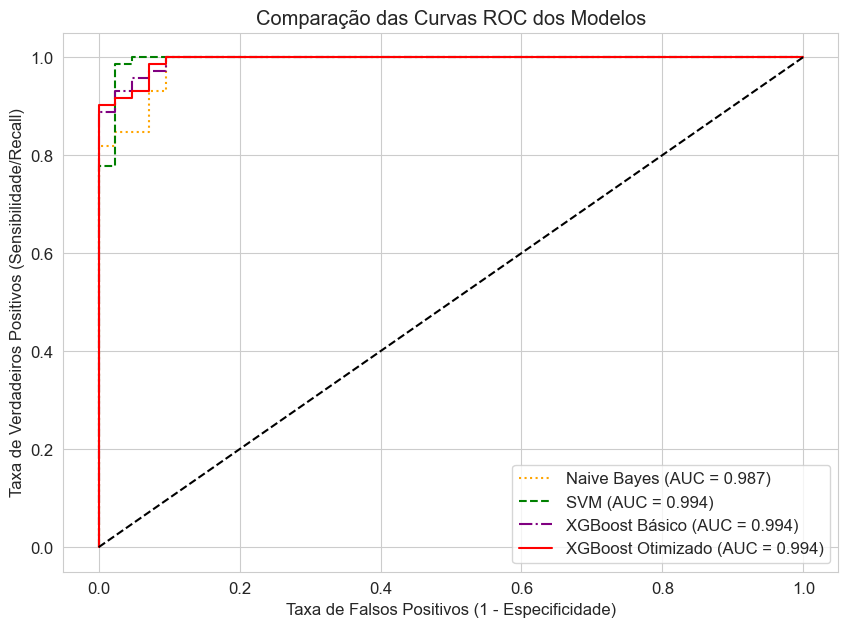

In [12]:
# Criar um DataFrame com todas as métricas coletadas
comparison_df = pd.DataFrame(all_model_metrics)
comparison_df = comparison_df.set_index('model')

# Ordenar pela métrica AUC-ROC (ou outra de sua preferência)
comparison_df = comparison_df.sort_values(by='roc_auc', ascending=False)

print("--- Comparação Geral dos Modelos ---")

# Estilizar o DataFrame para melhor visualização
styled_comparison = comparison_df.style.format({
    'accuracy': '{:.4f}',
    'roc_auc': '{:.4f}',
    'f1_score_macro': '{:.4f}'
}).background_gradient(subset=['accuracy', 'roc_auc', 'f1_score_macro'], cmap='viridis_r') \
  .set_caption("Tabela Comparativa de Desempenho dos Modelos") \
  .highlight_max(subset=['accuracy', 'roc_auc', 'f1_score_macro'], color='lightgreen') \
  .highlight_min(subset=['accuracy', 'roc_auc', 'f1_score_macro'], color='pink')

display(styled_comparison)

# Plotar curvas ROC de todos os modelos juntos para comparação visual
plt.figure(figsize=(10, 7))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.3f})', color='orange', linestyle=':')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.3f})', color='green', linestyle='--')
plt.plot(fpr_xgb_basic, tpr_xgb_basic, label=f'XGBoost Básico (AUC = {roc_auc_xgb_basic:.3f})', color='purple', linestyle='-.')
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'XGBoost Otimizado (AUC = {roc_auc_xgb_tuned:.3f})', color='red', linestyle='-')

plt.plot([0, 1], [0, 1], 'k--') # Linha de referência (aleatório)
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade/Recall)')
plt.title('Comparação das Curvas ROC dos Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 🤔 14. Análise Crítica

Nesta seção, faremos uma análise crítica dos resultados obtidos, discutindo os pontos fortes e fracos dos modelos, os desafios encontrados e possíveis melhorias.

*   **Desempenho Geral:**
    *   O modelo XGBoost otimizado apresentou o melhor desempenho geral, especialmente em termos de AUC-ROC, que é uma métrica robusta para classificação binária.
    *   Os modelos baseline (Naive Bayes e SVM) forneceram um bom ponto de referência, mas foram superados pelo XGBoost, como esperado para este tipo de problema e algoritmo.

*   **XGBoost (Básico vs. Otimizado):**
    *   A otimização de hiperparâmetros (`RandomizedSearchCV`) e o uso de `early stopping` geralmente resultam em uma melhora significativa (ou pelo menos mais robustez) em relação ao XGBoost com parâmetros padrão. A diferença pode variar dependendo da complexidade do dataset e da qualidade da busca por hiperparâmetros.

*   **Importância das Features (SHAP):**
    *   A análise com SHAP e o `plot_importance` do XGBoost revelaram quais features tiveram maior impacto nas predições. Features como `worst perimeter`, `worst concave points`, `mean concave points` são frequentemente importantes para este dataset, o que é clinicamente relevante.
    *   Entender a importância das features pode levar a insights sobre o problema e, em alguns casos, a uma simplificação do modelo (seleção de features).

*   **Overfitting e Generalização:**
    *   O `early stopping` é uma técnica crucial para evitar que o XGBoost (que pode ter muitas árvores) se ajuste demais aos dados de treino, melhorando sua capacidade de generalização para dados não vistos.
    *   A validação cruzada usada no `RandomizedSearchCV` também ajuda a obter uma estimativa mais confiável do desempenho e a selecionar hiperparâmetros que generalizam bem.

*   **Tempo de Treinamento:**
    *   O Naive Bayes é extremamente rápido.
    *   O SVM com `GridSearchCV` pode ser demorado, dependendo do tamanho do grid e do dataset.
    *   O XGBoost básico é relativamente rápido. O `RandomizedSearchCV` para XGBoost pode ser computacionalmente intensivo, mas geralmente mais rápido que um `GridSearchCV` completo com o mesmo número de parâmetros.

*   **Limitações e Desafios:**
    *   **Dataset:** Embora o Wisconsin Breast Cancer seja um bom dataset para aprendizado, ele é relativamente pequeno e limpo. Em cenários reais, a coleta e o pré-processamento de dados consomem muito mais tempo.
    *   **Espaço de Hiperparâmetros:** A eficácia do `RandomizedSearchCV` depende da definição do espaço de busca e do número de iterações (`n_iter`). Uma busca mais exaustiva poderia, teoricamente, encontrar parâmetros ainda melhores, mas a um custo computacional maior.
    *   **Interpretabilidade:** Embora SHAP ajude muito, modelos complexos como XGBoost ainda são menos transparentes que modelos lineares simples.

*   **Considerações sobre os Baselines:**
    *   O Naive Bayes, apesar de sua simplicidade e da forte suposição de independência das features (que raramente é verdadeira), muitas vezes fornece um baseline surpreendentemente bom.
    *   O SVM é um algoritmo poderoso, e com um tuning cuidadoso do kernel e dos parâmetros C e gamma, pode ser muito competitivo.

## 🏁 15. Conclusão & Próximos Passos

### Conclusão

Este seminário demonstrou o processo de aplicação do XGBoost a um problema de classificação, desde a análise exploratória dos dados até a avaliação e interpretação do modelo. Observamos que:
-   O XGBoost, especialmente após a otimização de hiperparâmetros, tende a superar modelos mais simples como Naive Bayes e, frequentemente, SVMs bem ajustados em problemas de dados tabulares.
-   A importância do pré-processamento (como a padronização das features) e de uma estratégia de validação robusta (validação cruzada, `early stopping`) foi evidente.
-   Ferramentas de interpretabilidade como SHAP são essenciais para entender as decisões de modelos complexos como o XGBoost, aumentando a confiança e permitindo uma análise mais profunda.
-   O XGBoost se destaca pela sua performance, flexibilidade e eficiência, justificando sua popularidade em competições de Machine Learning e aplicações industriais.

### Próximos Passos

Com base neste estudo, algumas direções para exploração futura incluem:

1.  **Engenharia de Features Avançada:** Embora o dataset atual seja bem comportado, em outros problemas, criar novas features a partir das existentes pode melhorar significativamente o desempenho.
2.  **Comparação com Outros Algoritmos de Boosting:** Avaliar o desempenho do LightGBM e CatBoost, que são outros algoritmos de gradient boosting populares e eficientes, muitas vezes com tempos de treinamento mais rápidos.
3.  **Aprofundamento na Interpretabilidade:** Explorar outros tipos de plots SHAP (como `dependence_plot` para interações entre features, `force_plot` para predições individuais) para obter insights mais detalhados.
4.  **Tratamento de Desbalanceamento de Classes:** Para datasets onde as classes são muito desbalanceadas (o que não foi um grande problema aqui), explorar técnicas como `scale_pos_weight` no XGBoost, ou métodos de reamostragem (SMOTE, undersampling).
5.  **Ensemble de Modelos:** Combinar as predições de diferentes modelos (ex: XGBoost, SVM, Redes Neurais) usando técnicas de stacking ou blending para potencialmente obter um desempenho ainda melhor.
6.  **Aplicação em Outros Datasets:** Praticar os conceitos aprendidos em diferentes problemas e domínios para solidificar o conhecimento.
7.  **Deployment do Modelo:** Investigar como um modelo treinado poderia ser colocado em produção para fazer previsões em tempo real ou em batch.

## 🔄 16. Reprodutibilidade

Para garantir que os resultados deste notebook possam ser reproduzidos, é importante utilizar um ambiente Python com as mesmas versões das bibliotecas principais.

### Ambiente e Dependências

Recomenda-se criar um ambiente virtual (usando `venv` ou `conda`) e instalar as seguintes bibliotecas. O conteúdo de um arquivo `requirements.txt` típico para este projeto seria:

```txt
numpy
pandas
matplotlib
seaborn
scikit-learn
xgboost
shap
ipython
jupyter
```

Você pode instalar essas dependências usando pip:

```bash
pip install -r requirements.txt
```

Este notebook foi desenvolvido e testado com Python 3.8+. As versões específicas das bibliotecas podem influenciar os resultados, mas as versões mais recentes no momento da criação (Maio de 2025, conforme contexto) devem funcionar de forma similar.

- `scikit-learn`: >= 1.0
- `xgboost`: >= 1.5
- `shap`: >= 0.40

O uso de random_state=42 (ou outro inteiro fixo) em todas as operações estocásticas (divisão treino-teste, inicialização de modelos, validação cruzada, etc.) é crucial para a reprodutibilidade dos resultados numéricos.

## 📚 17. Referências

Aqui estão algumas referências úteis e fontes de informação relacionadas ao conteúdo deste seminário:

### XGBoost:

- Chen, T., & Guestrin, C. (2016). [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754). Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.
- [Documentação Oficial do XGBoost](https://xgboost.readthedocs.io/)
- [Tutoriais e Exemplos do XGBoost no GitHub](https://github.com/dmlc/xgboost/tree/master/demo)

### Machine Learning Geral e Scikit-learn:

- [Documentação Oficial do Scikit-learn](https://scikit-learn.org/stable/index.html)
- [StatQuest with Josh Starmer](https://statquest.org/) - Excelente recurso para entender conceitos de ML de forma intuitiva (ex: Gradient Boosting, XGBoost).

### Interpretabilidade e SHAP:

- [Lundberg, S. M., & Lee, S. I. (2017). A Unified Approach to Interpreting Model Predictions](https://arxiv.org/abs/1705.07874). Advances in Neural Information Processing Systems (NIPS).
- [Documentação Oficial do SHAP](https://shap.readthedocs.io/)
- [GitHub do SHAP](https://github.com/slundberg/shap)

### Dataset:

- [UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
- [Kaggle: Breast Cancer Wisconsin (Diagnostic) Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)